## Import Packages

In [4]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


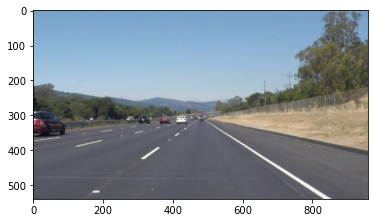

In [5]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Helper Functions

In [6]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):

    mask = np.zeros_like(img)   
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
           
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), [255, 0, 0], 5)
            
    return line_img

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

## Build a Lane Finding Pipeline



In [7]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

def lane_finding(image): 
    # Grayscale the image
    gray = grayscale(image)

    # Gaussian smoothing
    kernel_size = 5
    blur_gray = gaussian_blur(gray, kernel_size)

    # Canny transform
    low_threshold = 50
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)
    
    # Select ROI
    vertices = np.array([[(50,image.shape[0]),(image.shape[1]/2-45, image.shape[0]/2+60), 
                          (image.shape[1]/2+45, image.shape[0]/2+60), (image.shape[1]-50,image.shape[0])]], dtype=np.int32)
    maseked_edges = region_of_interest(edges, vertices)

    # Hough Transform
    rho = 1
    theta = np.pi/180
    threshold = 15
    min_line_len = 22
    max_line_gap = 18
    line_image = hough_lines(maseked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    
    # Draw the line on the original image
    result_image = weighted_img(line_image, image)
    
    return result_image

## Test Images

In [8]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

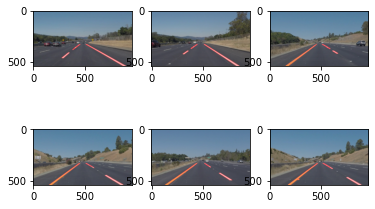

In [10]:
import glob
dir_testimg = glob.glob('test_images/*.jpg')

for i,test in enumerate(dir_testimg):
    image = mpimg.imread(test)
    result = lane_finding(image)
    plt.subplot(2,3,i+1)
    plt.imshow(result)
    #print(test[12:-4])
    #mpimg.imsave('test_images/'+'result_'+test[12:-4]+'.jpg', result)

## Test on Videos

In [ ]:
# 비디오 테스트 환경 설정
# pip install moviepy
# conda install -c conda-forge ffmpeg

# test_videos_output 디렉토리 만들기

In [11]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [12]:
def process_image(image):
    result = lane_finding(image)
    return result

In [13]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   0%|                                                                             | 0/221 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/solidWhiteRight.mp4.
Moviepy - Writing video test_videos_output/solidWhiteRight.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidWhiteRight.mp4
Wall time: 13.1 s


In [14]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [15]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

t:   0%|                                                                             | 0/681 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/solidYellowLeft.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidYellowLeft.mp4
Wall time: 34.3 s


In [16]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Challenge

In [17]:
challenge_output = 'test_videos_output/challenge.mp4'

clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   0%|                                                                             | 0/251 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/challenge.mp4.
Moviepy - Writing video test_videos_output/challenge.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/challenge.mp4
Wall time: 29.4 s


In [18]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

In [ ]:
## openCV Video 객체 이용해서 영상 처리

In [20]:
vid_path = "./test_videos/solidWhiteRight.mp4"
vid = cv2.VideoCapture(vid_path)

ret, img = vid.read()
if not ret:
    exit()
output_size = (img.shape[1], img.shape[0])
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('%s_output.mp4' % (vid_path.split('.')[0]), fourcc, vid.get(cv2.CAP_PROP_FPS), output_size)

try:
    if not vid.isOpened():
        exit()
    while True:
        ret, img = vid.read()
        if not ret:
            break
        img = process_image(img)
        cv2.imshow('img', img)
        out.write(img)
        if cv2.waitKey(25) == ord('q'):
             break
finally:
    vid.release()
    out.release()
    cv2.destroyAllWindows()
